In [42]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
file=uproot.open("run/debug-tree.root")
firstOrbitOfTheRun=188222

In [44]:
file.keys()

['st;5']

In [45]:
file['st'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
st                   | o2::quality_control_m... | AsGroup(<TBranchElement 'st...
st/deId              | uint16_t                 | AsDtype('>u2')
st/dsId              | uint16_t                 | AsDtype('>u2')
st/chip              | uint8_t                  | AsDtype('uint8')
st/sampaId           | uint32_t                 | AsDtype('>u4')
st/bx                | uint32_t                 | AsDtype('>u4')
st/firstTForbit      | uint32_t                 | AsDtype('>u4')
st/rdhOrbit          | uint32_t                 | AsDtype('>u4')
st/rdhBC             | uint16_t                 | AsDtype('>u2')


In [46]:
st=file['st'].arrays(["deId","dsId","chip","sampaId","bx","firstTForbit","rdhOrbit","rdhBC"],library="pd")

In [47]:
st.sort_values(by="deId")
st["deltaOrbit"]=st.rdhOrbit - st.firstTForbit
st["orbitVsSOR"]=st.rdhOrbit - firstOrbitOfTheRun

In [48]:
st.agg(['max','min'])

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
max,1025,1361,1,33639,1048575,12555070,12555197,3563,127,12366975
min,100,1,0,0,0,192958,192958,0,0,4736


In [49]:
print(len(st.sampaId), len(st.sampaId.unique()),len(st.firstTForbit.unique()))
st.value_counts(subset="sampaId",ascending=True)

40074660 30248 206


sampaId
25390          1
25391          1
2600           1
23779          2
33608          2
          ...   
12648    1875674
8712     1877519
8494     1879364
10920    1879364
12493    1879382
Length: 30248, dtype: int64

In [50]:
one_chip = (st["deId"]==103) & (st["dsId"]==16) & (st["chip"]==1)
another = (st["deId"]==506) & (st["dsId"]==105) & (st["chip"]==0)

In [51]:
c=st.loc[(st.deId==508)]
c

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
173819,508,5,1,15309,877945,192958,192958,0,0,4736
173820,508,123,1,15345,969581,192958,192958,0,0,4736
173821,508,125,1,15349,737481,192958,192958,0,0,4736
173822,508,102,1,15317,256449,192958,192958,0,0,4736
173835,508,1154,1,15443,195973,192958,192958,0,0,4736
...,...,...,...,...,...,...,...,...,...,...
39898876,508,1242,0,15468,588729,12534718,12534718,256,0,12346496
39898893,508,102,0,15316,687325,12534718,12534718,256,0,12346496
39898894,508,122,0,15342,716077,12534718,12534718,256,0,12346496
39898895,508,123,0,15344,343249,12534718,12534718,256,0,12346496


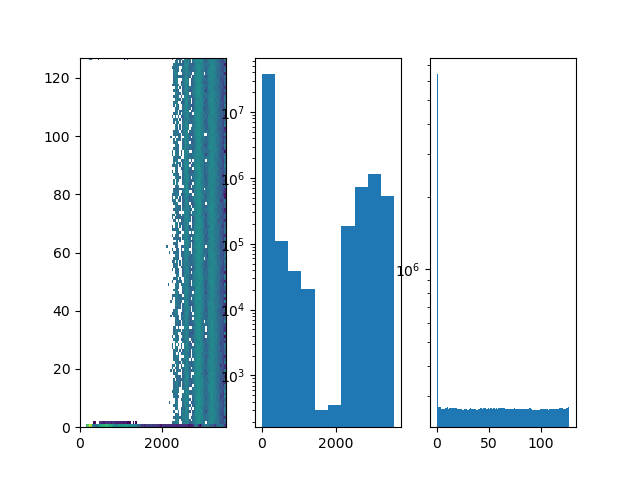

In [52]:
import matplotlib as mpl
f,axes=plt.subplots(1,3)
axes[0].hist2d(st.rdhBC,st.deltaOrbit,norm=mpl.colors.LogNorm(),bins=(100,128))
axes[1].hist(st.rdhBC)
axes[1].set_yscale("log")
axes[2].hist(st.deltaOrbit,bins=128)
axes[2].set_yscale("log")

In [61]:
st[st.deltaOrbit>2].describe()

,deId,dsId,chip,sampaId,bx,firstTForbit,rdhOrbit,rdhBC,deltaOrbit,orbitVsSOR
count,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07,3.313817e+07
mean,3.447811e+02,6.527639e+02,3.828696e-01,1.014927e+04,3.495094e+05,7.998647e+06,7.998712e+06,2.221569e+02,6.496757e+01,7.810490e+06
std,4.958662e+01,5.330394e+02,4.860869e-01,1.768537e+03,3.492940e+05,4.748973e+06,4.748973e+06,7.776671e+02,3.610509e+01,4.748973e+06
min,3.010000e+02,1.000000e+00,0.000000e+00,8.280000e+03,0.000000e+00,1.929580e+05,1.929610e+05,0.000000e+00,3.000000e+00,4.739000e+03
25%,3.010000e+02,1.090000e+02,0.000000e+00,8.497000e+03,3.000000e+00,1.216958e+06,1.217025e+06,0.000000e+00,3.400000e+01,1.028803e+06
50%,3.020000e+02,2.330000e+02,0.000000e+00,9.585000e+03,2.621450e+05,1.039776e+07,1.039787e+07,0.000000e+00,6.500000e+01,1.020964e+07
75%,4.010000e+02,1.196000e+03,1.000000e+00,1.249300e+04,6.541530e+05,1.149677e+07,1.149678e+07,0.000000e+00,9.600000e+01,1.130855e+07
max,9.130000e+02,1.360000e+03,1.000000e+00,2.807500e+04,1.048575e+06,1.255507e+07,1.255520e+07,3.563000e+03,1.270000e+02,1.236698e+07


In [54]:
((st[one_chip].firstTForbit - firstOrbitOfTheRun) / 128)[:3]

79         37.0
191644    197.0
400024    357.0
Name: firstTForbit, dtype: float64

In [55]:
NOF_BC_PER_ORBIT = 3564
ROLL_OVER = 1<<20
 
def sampa_bc_from_global_bc(bc):
    orbitRef=firstOrbitOfTheRun
    bcRef=0
    globalBcRef = orbitRef*NOF_BC_PER_ORBIT + bcRef
    bx = np.subtract(bc,globalBcRef)
    return np.where(bx<ROLL_OVER,bx,bx%ROLL_OVER)

In [56]:
sampaId=19
ntimeframes=30
norbits=(ntimeframes+1)*128
firstSampaOrbit=st[st.sampaId==sampaId][:1].rdhOrbit.values[0]
firstSampaOrbit

192958

In [57]:
orbits=np.arange(firstSampaOrbit,firstSampaOrbit+norbits)
bc=np.multiply(orbits,NOF_BC_PER_ORBIT)
sampa_bc=sampa_bc_from_global_bc(bc)
ix=np.arange(0,len(st))*127*160
ix[:4]

array([    0, 20320, 40640, 60960])

In [58]:
def plot_random_bcs(bc,ax,n):
    for i in range(1,n):
        r=np.random.choice(bc)
        x=(r,r+128*NOF_BC_PER_ORBIT)
        y=sampa_bc_from_global_bc(x)
        s=ax.scatter(x,y)
        xl=(x[0],x[0],x[1],x[1])
        yl=(y[0],0,0,y[1])
        ax.plot(xl,yl,color=s.get_facecolor(),linestyle="dotted")

In [59]:
def plot_timeframe_limits(bc,ax):
    orbits=bc/NOF_BC_PER_ORBIT
    for orbit in range(1,len(orbits),128):
        bc = orbits[orbit]*NOF_BC_PER_ORBIT
        ax.axvline(x=bc,color="red" if orbit==1 else "grey",alpha=0.5)
        

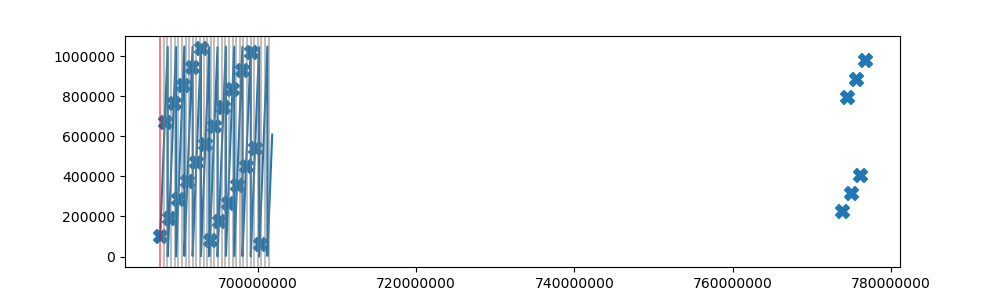

In [60]:
%matplotlib widget
from matplotlib.ticker import FormatStrFormatter
f,ax=plt.subplots(1,1,figsize=(10,3))
ax.plot(bc,sampa_bc)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#plot_random_bcs(bc,ax,5)
plot_timeframe_limits(bc,ax)

sone=st[st.sampaId==sampaId][:ntimeframes-1]
spx=(sone.rdhOrbit-ix[:ntimeframes-1])*NOF_BC_PER_ORBIT
spy=sampa_bc_from_global_bc(spx)

ax.scatter(spx,spy,s=100,marker="X")
